# Problem 24.2

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sig

##### Define a random signal to be used to test filters.

In [2]:
nsig = 1000
y = np.random.uniform(low=-1., high=1., size=nsig)

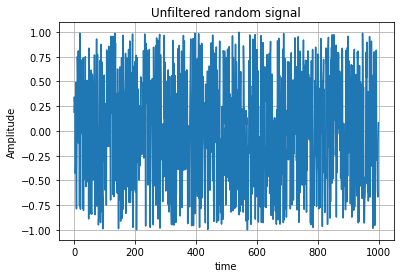

In [3]:
plt.plot(y)
plt.xlabel('time')
plt.ylabel('Amplitude')
plt.grid()
plt.title('Unfiltered random signal')
plt.show()

##### Define the filters

Filter 1 is a unweighted moving average over 9 elements; filter 2 is an weighted moving average over 9 elements. 

In [4]:
nf = 9

In [5]:
filt1 = np.ones(nf)

In [6]:
filt2 = np.zeros(nf)
for i in range(nf):
    filt2[i] = (1-np.abs((4-i))/5.)
print('the filter is: ',filt2)

the filter is:  [0.2 0.4 0.6 0.8 1.  0.8 0.6 0.4 0.2]


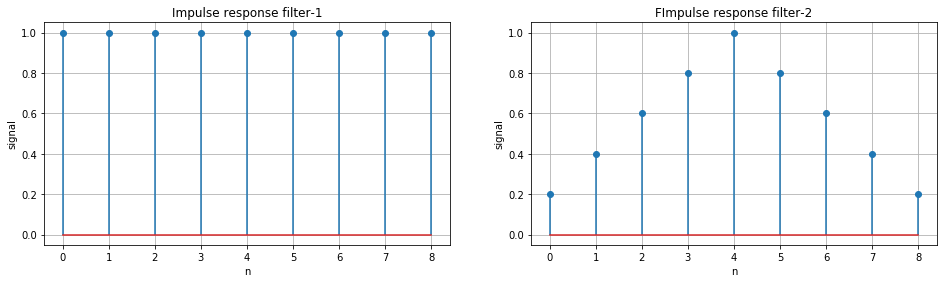

In [7]:
plt.figure(figsize=(16,9))
plt.subplot(221)
plt.stem(filt1,use_line_collection=True)
plt.xlabel('n')
plt.ylabel('signal')
plt.title('Impulse response filter-1')
plt.grid(True)
plt.subplot(222)
plt.stem(filt2,use_line_collection=True)
plt.xlabel('n')
plt.ylabel('signal')
plt.title('FImpulse response filter-2')
plt.grid(True)

##### Filer response

In [8]:
w1, h1 = sig.freqz(filt1)
w2, h2 = sig.freqz(filt2)

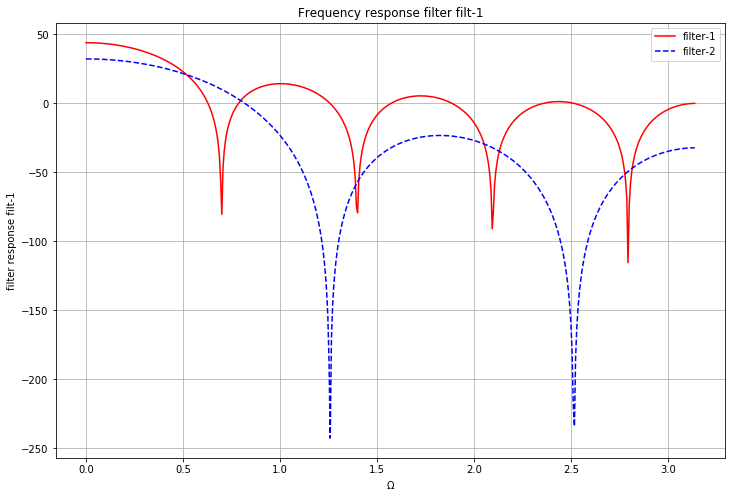

In [9]:
plt.figure(figsize=(12,8))
plt.plot(w1,20*np.log(abs(h1)),'r',label='filter-1')
plt.plot(w2,20*np.log(abs(h2)),'b--',label='filter-2')
plt.xlabel(r'$\Omega$')
plt.ylabel('filter response filt-1')
plt.grid()
plt.legend()
plt.title('Frequency response filter filt-1')
plt.show()

##### Apply the filters on the signal

In [10]:
yfilt1 = sig.convolve(y,filt1)
yfilt2 = sig.convolve(y,filt2)

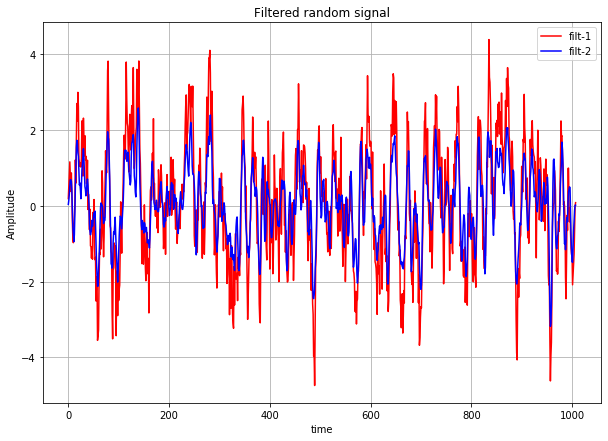

In [11]:
plt.figure(figsize=(10,7))
plt.plot(yfilt1,'r',label='filt-1')
plt.plot(yfilt2,'b',label='filt-2')
plt.xlabel('time')
plt.ylabel('Amplitude')
plt.grid()
plt.title('Filtered random signal')
plt.legend()
plt.show()

In [12]:
fy = np.fft.fft(y)
ffilt1 = np.fft.fft(yfilt1)
ffilt2 = np.fft.fft(yfilt2)

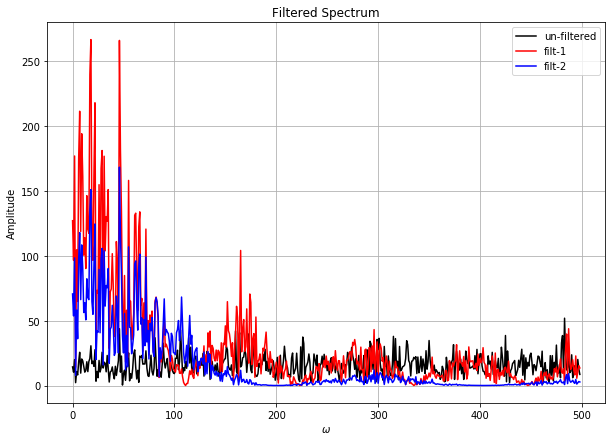

In [13]:
plt.figure(figsize=(10,7))
plt.plot(np.abs(fy[1:np.int(nsig/2)]),'k',label='un-filtered')
plt.plot(np.abs(ffilt1[1:np.int(nsig/2)]),'r',label='filt-1')
plt.plot(np.abs(ffilt2[1:np.int(nsig/2)]),'b',label='filt-2')
plt.xlabel(r'$\omega$')
plt.ylabel('Amplitude')
plt.grid()
plt.title('Filtered Spectrum')
plt.legend()
plt.show()